# Analyzing Black Friday Sales Data
    by Kevin Hung and Jason Hipkins

Index: 

A. Intro

Step 1: Data Tidying

Step 2: Exploratory Data Analysis (EDA) and Visualization  

Step 3: Hypothesis Testing and Machine Learning (ML)

B.  Conclusion

# A. Introduction
The holidays are always a good time of year to shop for loved ones and yourself. Why? Because of the sales! Sales help everyone. They make more money for the seller by encouraging people to spend more on percieved and real savings, as well as save money for the consumer whose dollar can now go farther. In order for business to maximize potential revunue over the holidays it must compete in an advertising game with competitors. To be competitive in sales they need to be competitive in advertising expindetures. The more people who see the advertisement, the more likley it will generate more interest and projected sales. However, showing everyone an advertisement without discrimination can be costly. The online footprint of consumers means there is a treasure trove of data on indivuduals. Being able to deliver targeted ads is an increasingly important ethical question, as well as a business decision. If a business can spend less money on advertising, but still generate the same level of interest and sales, it will have achieved greater revuenue. If a corporation is profit-driven then they should and will take every advantage to maximize revunue.
   
For our final tutorial in CMSC320 we will present techniques learned throughout the class to analyze a randomized Black Friday sales dataset in attempt to gain insight on spending patterns for specific consumers and to see if we can create a prediction model to predict certain attributes of consumers. The data we are going to use is randomized, and is retail store with 3 locations.

# Step 1: Data Collection

We have made the csv used for this tutorial on our github and can be found at this link: https://raw.githubusercontent.com/khung97/khung97/master/BlackFriday.csv 

This part of the tutorial will provide a walkthrough of how to import the raw data and clean it up, leaving readble and usable information. 

### Required Imports:

In [1]:
import pandas as pd
from pandas import DataFrame as pdf
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels import api as sms
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn import linear_model #for linear regression
from sklearn.preprocessing import PolynomialFeatures #polynomial regression

### Surpressing Warnings:

In [2]:
import warnings
warnings.filterwarnings('ignore') ### for supressing warnings

### Import Raw Data:

In [3]:
bfsales = pd.read_csv("./BlackFriday.csv")

### Take a Precursory Look at Data: 

In [4]:
bfsales.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [5]:
bfsales.isnull().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [6]:
bfsales.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


### Data Tidying
  

First, we decided to turn Product ID into an integer to help with analysis by stripping the initial P and converting it into an int.

In [7]:
bfsales['Product_ID'] = bfsales['Product_ID'].map(lambda x: x.lstrip('P'))
bfsales['Product_ID'] = bfsales['Product_ID'].astype(int)

Next, we decided to drop the column "Stay_In_Current_City_Years" because it is not as descriptive as we would like it to be. It only has the options of 1,2,3, and 4+. Someone who is 55+ could have stayed 10 maybe 20 years in their city. 4+ is not descriptive enough. Additionally, we observed a lot of NaN values in Product_Category_2 and 3, so we decided to drop those columns too. 

In [8]:
print("old columns")
print(bfsales.columns)
bfsales=bfsales.drop(columns=['Stay_In_Current_City_Years','Product_Category_2','Product_Category_3'],axis=1)
print("\n new columns:")
bfsales.columns

old columns
Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

 new columns:


Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Marital_Status', 'Product_Category_1', 'Purchase'],
      dtype='object')

Lastly, we made sure all our columns are the proper variable types, converting all columns into strings or ints, except age which was a range. 

In [9]:
bfsales['User_ID'] = bfsales['User_ID'].astype(int)
bfsales['Product_ID'] = bfsales['Product_ID'].astype(int)
bfsales['Gender'] = bfsales['Gender'].astype(str) # potentially change gender to 0 or 1
bfsales['Occupation'] = bfsales['Occupation'].astype(int)
bfsales['City_Category'] = bfsales['City_Category'].astype(str) # potentially change to 0,1,2 rather than A,B,C
bfsales['Marital_Status'] = bfsales['Marital_Status'].astype(int)
bfsales['Product_Category_1'] = bfsales['Product_Category_1'].astype(int)
bfsales['Purchase'] = bfsales['Purchase'].astype(int)

# Step 2: EDA and Visualization

First, lets take a precursory look at our new, cleaned data:

In [10]:
bfsales.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Purchase
0,1000001,69042,F,0-17,10,A,0,3,8370
1,1000001,248942,F,0-17,10,A,0,1,15200
2,1000001,87842,F,0-17,10,A,0,12,1422
3,1000001,85442,F,0-17,10,A,0,12,1057
4,1000002,285442,M,55+,16,C,0,8,7969
5,1000003,193542,M,26-35,15,A,0,1,15227
6,1000004,184942,M,46-50,7,B,1,1,19215
7,1000004,346142,M,46-50,7,B,1,1,15854
8,1000004,97242,M,46-50,7,B,1,1,15686
9,1000005,274942,M,26-35,20,A,1,8,7871


First, we look into purchasing patterns broken down by age groups using seaborn (sns):

We can see that the age groups that purchase the most are in age ranges 26-35, 36-45, and 18-25.

Advertising to these groups would be the most cost-effecient since they are the highest proportion of shoppers, and more likely to interact with an advertisement.

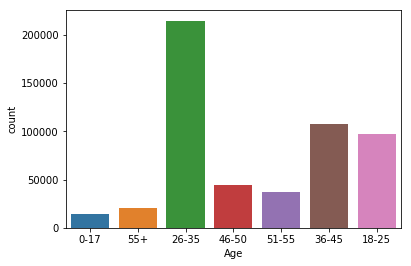

In [11]:
sns.countplot(bfsales['Age'])

If we split age groups by city_category, we can see that city B spends the most for all the significant spending groups (ages 26-35, 36-45, and 18-25):

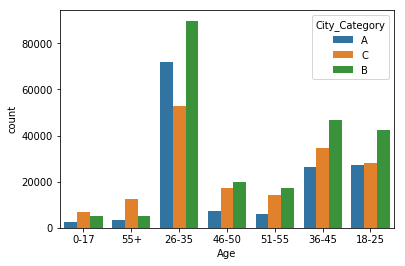

In [12]:
sns.countplot(bfsales['Age'],hue=bfsales['City_Category'])

We can say that the majority of advertising dollars should be spent in city B, since that is where the most shopping is done. However, this might present an oppurtunity to target ads to lower revenue cities in attempt to bring in more people in our targeted age groups.

Next, we decided to take a look at the most popular product categories from Product_Category_1:

Here, we can see that categories 1, 5, and 8 are by far the most popular in all cities and among users. We can devise a marketing strategy based on which categories wish to be improved (whether it be the most popular or least popular categories). However, for this project we will stick with targetting ads to our most prevalent audience and their tastes.

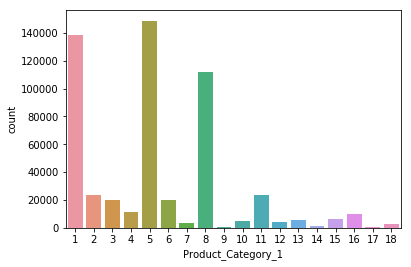

In [13]:
sns.countplot(bfsales['Product_Category_1'])

To further isolate our audience for targeted ads, we can plot product category counts, split up by age groups:

When we do that, we can see that the three most active purchasing age groups (ages 26-35, 36-45, and 18-25) also buy a significant amount of the three most popular product categories (1, 5, and 8). This may be an interesting purchasing group to target for further analysis. 

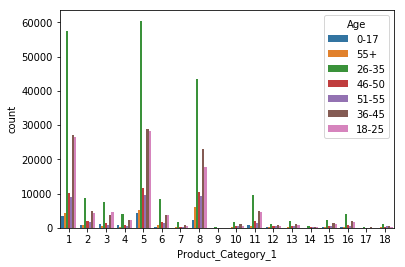

In [14]:
sns.countplot(bfsales['Product_Category_1'],hue=bfsales['Age'])

We would like to further reduce our dollars spent on ads by targeting our core consumer audience even more. We attempt to visualize how occupation potentially plays a role by plotting another count plot with seaborn:

Here we do not see any occupation numbers that are clearly the most frequent purchasers, but it is worth noting that numbers 0, 4, 7, 12, 17, and 20 do have high relative counts. 

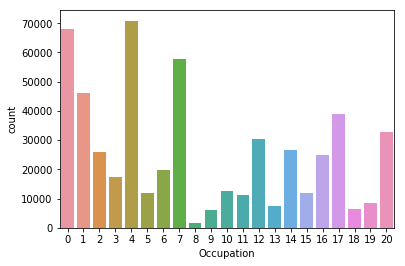

In [15]:
sns.countplot(bfsales['Occupation'])

Next, we can look at occupation counts, but split by age groups:
    
Here we can observe certain age groups in certain occupations compromise a LARGE amount of purchases. For example, adults ages 18-25 in occupation #4 make more purchases than all people in occupation #20 combined, even though occupation #20 makes the fifth largest amount of purchases out of all 20 occupation categories. People in Occupation #0 between ages 26 and 35 also jumped out due to a large purchase count. These age group/occupation should definitely be targeted for advertisements as they constitute a large amount of purchases.  

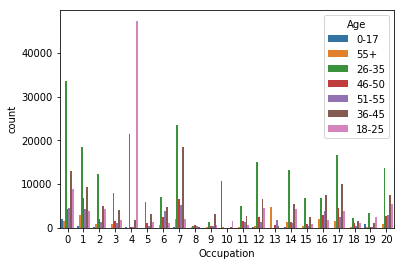

In [16]:
sns.countplot(bfsales['Occupation'],hue=bfsales['Age'])

Now that we have some basic insights on which values for certain attributes are attributed to frequent purchase counts, we can isolate them for easier calculations and manipulation. In the proceeding code, we decided to extract those in age groups 18-25, 26-35, and 36-45, those in occupations 0, 4, and 7, and those in product category 1, 5, and 8. 

In [17]:
temp1=pd.DataFrame(columns=bfsales.columns)
small_bf_age_final=pd.DataFrame(columns=bfsales.columns)

temp2=pd.DataFrame(columns=bfsales.columns)
small_bf_occupation_final=pd.DataFrame(columns=bfsales.columns)

temp3=pd.DataFrame(columns=bfsales.columns)
small_bf_pc_final=pd.DataFrame(columns=bfsales.columns)

small_bf_age1= bfsales[bfsales.Age=="18-25"]
small_bf_age2= bfsales[bfsales.Age=="26-35"]
small_bf_age3= bfsales[bfsales.Age=="36-45"]
temp1=small_bf_age1.append([small_bf_age2])
small_bf_age_final=temp1.append([small_bf_age3])

small_bf_occupation1=small_bf_age_final[small_bf_age_final.Occupation==0]
small_bf_occupation2=small_bf_age_final[small_bf_age_final.Occupation==4]
small_bf_occupation3=small_bf_age_final[small_bf_age_final.Occupation==7]
temp2=small_bf_occupation1.append([small_bf_occupation2])
small_bf_occupation_final=temp2.append([small_bf_occupation3])

small_bf_pc1=small_bf_occupation_final[small_bf_occupation_final.Product_Category_1==1]
small_bf_pc2=small_bf_occupation_final[small_bf_occupation_final.Product_Category_1==5]
small_bf_pc3=small_bf_occupation_final[small_bf_occupation_final.Product_Category_1==8]
temp3=small_bf_pc1.append([small_bf_pc2])
small_bf_pc_final=temp3.append([small_bf_pc3])


Now, we have a dataframe with only our "best customers" and "best products", based on age group, occupation, and product category. Lets take a precursory look at the dataframe to ensure we have pulled only the relevant data.

In [18]:
small_bf_pc_final

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Purchase
1701,1000272,118442,M,18-25,0,A,0,1,11893
1702,1000272,142942,M,18-25,0,A,0,1,15216
1709,1000272,350342,M,18-25,0,A,0,1,7708
1716,1000272,216142,M,18-25,0,A,0,1,11784
1717,1000272,352142,M,18-25,0,A,0,1,7738
1718,1000272,352642,M,18-25,0,A,0,1,7830
1719,1000272,145642,M,18-25,0,A,0,1,15513
1810,1000295,304242,M,18-25,0,C,0,1,11535
1811,1000295,112642,M,18-25,0,C,0,1,19158
1812,1000295,233542,M,18-25,0,C,0,1,15558


Now that we have the a new dataframe with only the attribute values of high counts, we can use this information further to learn about our most frequent consumers by bring in some of the previously unexamined variables in the dataframe. In the following code, we are taking the gender counts, city counts, and marriage status counts of our best customers to graph after.

In [19]:
#get gender counts 
small_bf_gender_M=small_bf_pc_final[small_bf_pc_final.Gender=='M']
gm=small_bf_gender_M['User_ID'].count()
small_bf_gender_F=small_bf_pc_final[small_bf_pc_final.Gender=='F']
gf=small_bf_gender_F['User_ID'].count()

#get city counts 
small_bf_city_A=small_bf_pc_final[small_bf_pc_final.City_Category=='A']
cityA=small_bf_city_A['User_ID'].count()
small_bf_city_B=small_bf_pc_final[small_bf_pc_final.City_Category=='B']
cityB=small_bf_city_B['User_ID'].count()
small_bf_city_C=small_bf_pc_final[small_bf_pc_final.City_Category=='C']
cityC=small_bf_city_C['User_ID'].count()

#get martial status counts 
small_bf_married_no=small_bf_pc_final[small_bf_pc_final.Marital_Status==0]
small_bf_married_yes=small_bf_pc_final[small_bf_pc_final.Marital_Status==1]
mNo=small_bf_married_no['User_ID'].count()
mYes=small_bf_married_yes['User_ID'].count()

chart1=pd.DataFrame(columns=['Gender','Count'])
chart2=pd.DataFrame(columns=['City','Count'])
chart3=pd.DataFrame(columns=['Martial_Status','Count'])


gm,gf,cityA,cityB,cityC,mNo,mYes

chart1.loc[0]=["M",gm]
chart1.loc[1]=["F",gf]

chart2.loc[0]=["A",cityA]
chart2.loc[1]=["B",cityB]
chart2.loc[2]=["C",cityC]

chart3.loc[0]=["Single",mNo]
chart3.loc[1]=["Married",mYes]



#### Now, we can construct bar charts showing splits for the previously chosen attributes for our best customers' sales. 

In the following bar plot and count calculations, we can see how males compromise a large majority of our best customers' sales. In fact, they are almost 78% of them.

0.7776918829376035

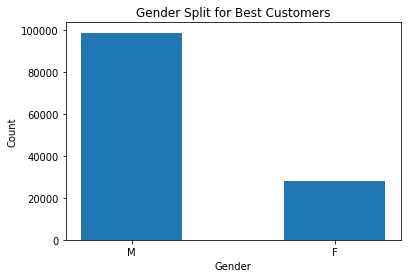

In [20]:
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Split for Best Customers')
bar1=plt.bar(chart1['Gender'],chart1['Count'], align='center', width=0.5)
gm/(gf+gm)

In the following bar chart and count calculations, we can see that our best customers' sales are somewhat equally spread out throughout cities A, B, and C, though city B is the most frequent with around 40% of best customers' sales. 

(0.32643369882464307, 0.40150666561489312, 0.27205963556046381)

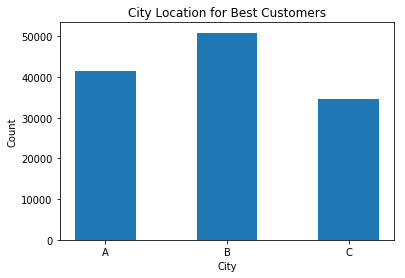

In [21]:
plt.xlabel('City')
plt.ylabel('Count')
plt.title('City Location for Best Customers')
bar2=plt.bar(chart2['City'],chart2['Count'], align='center', width=0.5)
cityA/(cityA+cityB+cityC),cityB/(cityA+cityB+cityC),cityC/(cityA+cityB+cityC)

In the following bar chart and count calculations, we can see that our best customers' sales are mostly from people who are single. In fact, they make up over 2/3rds of our best customers' sales. Knowing these attributes about our best shoppers will allows advertisers to target them with certain marketing strategies based on their attributes. For example, it would probably be better to target ads for feminine products to females or married males. 

0.67528595093476373

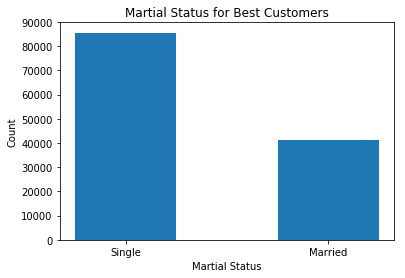

In [22]:
plt.xlabel('Martial Status')
plt.ylabel('Count')
plt.title('Martial Status for Best Customers')
bar2=plt.bar(chart3['Martial_Status'],chart3['Count'], align='center', width=0.5)
mNo/(mYes+mNo)

### From the three bar charts above, we can hesitantly declare that our best customer sales are from those who are single males living in city B, although city location is not as big of an indicator as the other attributes. 

Next, let's attempt to find the mode for the Purchase Category to get some insight on spending patterns. First, we made a distribution plot using seaborn:

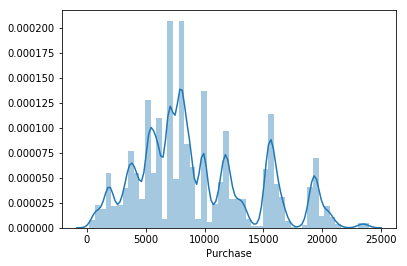

In [23]:
sns.distplot(bfsales['Purchase'])

We can see from the purchase distribution that there are multiple groupings of commonly spent dollars. The density curve has 12 2nd derivatives (peaks), so we can try adding 12 bins to get a nicer approximation of the mode:

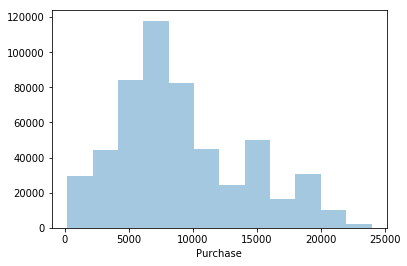

In [24]:
sns.distplot(bfsales['Purchase'], bins = 12, kde = False)

#### Seaborn will not give us the bin sizes that we wish to know. It is nice to use Seaborn for EDA because of how quickly it lets us visualize data we want to see. Often in one or two lines. Elsewhere we will use Pandas plotting functions, or matplotlib.

 However, a simple calculation can help us approximate what they should be:
 
 Bin size = (max-min)/bins

In [25]:
max = bfsales['Purchase'].max()
min = bfsales['Purchase'].min()
bins = 12
size = (max-min)/bins
mode = size*3
bin_end = mode+size
print("The mode is in the range: " + str(int(mode)) + "-" + str(int(bin_end)))

The mode is in the range: 5944-7925


# Step 3: Hypothesis Testing and ML

For this section, we are looking at the impacts of five variables (gender, martial status, occupation, age, and product category) on purchase amount for our new dataframe of best customers' sales. Our null hypothesis will be:

### None of the above five attributes have a noticeable impact on Purchase.

To test the null hypothesis, we will perform a multiple linear regression on the dataset using the python library statsmodels after enumerating variables that are strings, such as Age and Gender.

In [26]:
target_attrs=['Gender','Marital_Status','Occupation','Age','Product_Category_1']
features=small_bf_pc_final[target_attrs] 
features=features.replace("M",0)
features=features.replace("F",1)
features=features.replace("A",1)
features=features.replace("B",2)
features=features.replace("C",3)
features=features.replace("0-17",1)
features=features.replace("18-25",2)
features=features.replace("26-35",3)
features=features.replace("36-45",4)
features=features.replace("46-50",5)
features=features.replace("51-55",6)
features=features.replace("55+",7)
target=small_bf_pc_final[['Purchase']]

In the following cell, we use the statsmodels library to create regression using the Ordinary Least Squares (OLS) method:

The summary of OLS regression results give us a fair amount of insight on how well those variables influence Purchase. While there is an R-squared value of 0.799, it does not neccessarily mean that the model is a great fit. This website has a good explanation of interpreting R-squared results: http://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit. 

When we examine each variable seperately, we can see Gender, Martial_Status, Occupation, Age, and Product_Category all have extremely low P>|t|	values (all under 0.05). This means that these variables most likely have a relationship to the Dependent Variable. This webpage does a good job explaining the OLS Regression Results: https://blog.datarobot.com/ordinary-least-squares-in-python

### From the results below, we can reject the null hypothesis, but our R-squared value is still not ideal. 

In [27]:
x1 = features
y1 = target['Purchase']
sms_y = y1
sms_X = x1

sms_X = sms.add_constant(x1)

OLS_model = sms.OLS(y1,x1).fit()
OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                 1.006e+05
Date:                Sat, 15 Dec 2018   Prob (F-statistic):               0.00
Time:                        05:17:11   Log-Likelihood:            -1.2483e+06
No. Observations:              126770   AIC:                         2.497e+06
Df Residuals:                  126765   BIC:                         2.497e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Gender               896.5406     30.899     29.015      0.000     835.980     957.102
Marital_Status       -57.6562     27.951     -2.063      0.039    -112.440      -2.872
Occupation           265.0003      4.653     56.949      0.000     255.880     274.121
Age                 3609.6380      9.778    369.177      0.000    3590.474    3628.802
Product_Category_1  -662.3628      4.415   -150.042      0.000    -671.015    -653.710
==============================================================================
Omnibus:                      789.424   Durbin-Watson:                   0.756
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              767.715
Skew:                           0.170   Prob(JB):                    1.96e-167
Kurtosis:                       2.829   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 Next, we attempt to use the sklearn library and its predict function for Machine Learning (ML) in a attempt to create a prediction model. First, we need to create test data and then generate our predictions. Then, we can compare the two. 
 
 https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9 is a good webpage for understanding statsmodels libary's built-in regressions capablities and sklearn's regression and ML capabilities . 
    

In [28]:
lm = linear_model.LinearRegression()
MLmodel = lm.fit(x1,y1)
lm.score(x1,y1)

x_train, x_test, y_train, y_test = model_selection.train_test_split(x1, y1)
lm = linear_model.LinearRegression()
MLmodel = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)
predictions[0:50]

array([  5397.30688682,   5482.85450734,  12369.2872659 ,   8434.18283244,
         5507.95127183,   5737.12994388,   8544.82721745,  12283.73964538,
         8415.93680363,  12291.77409357,   8415.93680363,   5464.60847853,
         5405.34133501,   8551.96061793,   8466.41299741,   5550.15609905,
        12266.67732908,  12369.2872659 ,   5593.49889235,   5684.99620084,
         8518.54674045,   5464.60847853,   8356.66966011,  12487.06505139,
         5634.52000706,   5405.34133501,   8374.91568892,  12369.2872659 ,
         5684.99620084,   8585.84833216,  12351.04123709,   8415.93680363,
        12369.2872659 ,   5567.21841535,  12436.58885761,   8526.58118864,
         5482.85450734,  12351.04123709,   5490.88895553,   8374.91568892,
         5575.25286354,  12351.04123709,   8721.87214646,   8518.54674045,
         5684.99620084,   5567.21841535,   8604.09436097,   8636.32452594,
         8721.87214646,   5397.30688682])

Now that we have our predicted values, we can graph them to compare to the actual values. If they are 100% correct, it should be a linear line, which we have plotted below to help visualize accuracy. We can see below that the predicted and acutual values are not even close. 

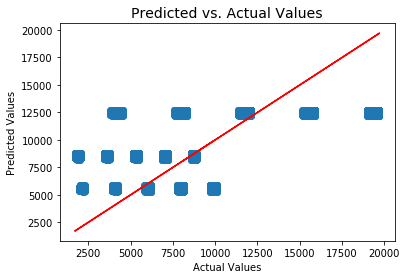

In [29]:
plt.title("Predicted vs. Actual Values", fontsize=14)
plt.scatter(y_test,predictions)
plt.plot(y_test, y_test, color="Red") # identity line y=x
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

Next, we use the score() function on our Machine Learning model to verify accuracy. As we may have predicted form the graph above, our ML score (0-1) is not very good (0.37), alluding to a less than accurate model. 

In [30]:
MLmodel.score(x_test, y_test)

0.37767087154940249

## Logit Model
#### In our data we can see that marital status is a binary variable. If we are targetting ads based on marital status, being able to predict, or impute the unkown maritcal status of a consumer would be useful. We will set up a logistical model which we will train to predict based on available data if a consumer is married. 

The data we want to predict looks fairly balance so we can proceed with the regression analysis. 

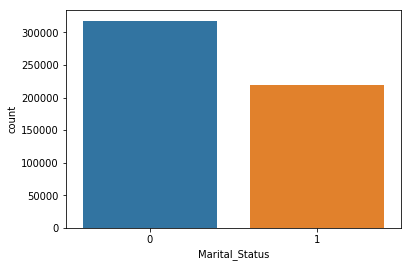

In [31]:
sns.countplot("Marital_Status", data=bfsales)

First we need to make our variables into categorical variables. This means replacing them with 1 and 0s to work with the logit model. (A binary model)

In [32]:
city = pd.get_dummies(bfsales['City_Category'], drop_first = True)
gender = pd.get_dummies(bfsales['Gender'], drop_first = True)
age = pd.get_dummies(bfsales['Age'], drop_first = True)

We won't need the original columns in our data to do the model, and we also won't want the User_ID since we cannot predict 
if someone is married based on their identifying key. Their key says they either are or are not married and does not lend to ours analysis. 

In [33]:
logit_data = bfsales
logit_data.drop(['City_Category', 'Gender', 'Age', 'User_ID'], axis=1, inplace = True)
logit_data = pd.concat([logit_data, gender, city, age], axis = 1)
logit_data.head()

,Product_ID,Occupation,Marital_Status,Product_Category_1,Purchase,M,B,C,18-25,26-35,36-45,46-50,51-55,55+
0,69042,10,0,3,8370,0,0,0,0,0,0,0,0,0
1,248942,10,0,1,15200,0,0,0,0,0,0,0,0,0
2,87842,10,0,12,1422,0,0,0,0,0,0,0,0,0
3,85442,10,0,12,1057,0,0,0,0,0,0,0,0,0
4,285442,16,0,8,7969,1,0,1,0,0,0,0,0,1


We know check to see that our variables are indepdent of one another so that we can be sure they will not affect our analysis of the value we want to predict, Marital_Status. 
We can see that City B and C might affect one another, however this is fine since we expect geography might be correlated. We also see a correlation b/w Marital_Status and age which is expected since younger people are not as frequently married as older people. 

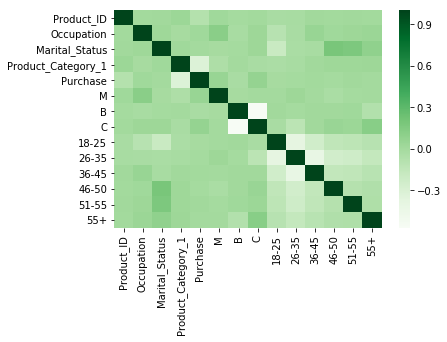

In [34]:
sns.heatmap(logit_data.corr(), cmap = "Greens")

In order to make our model as accurate as possible, we can use ML from scikit learn. Here we will split the data into training data consistiting of 30% the size of the original data. 

In [35]:

from sklearn.model_selection import train_test_split

X = logit_data.loc[:, logit_data.columns != 'Marital_Status']
y = logit_data.loc[:, logit_data.columns == 'Marital_Status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

We can use recursive feature elemination which can be read about at the following link: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
        
This will help us decide if any of our variables would be bad classifiers for predicting marital status. After running, it doesn't look like we should remove any variables, which is good.

In [36]:
data_final_vars=logit_data.columns.values.tolist()
y=['Marital_Status']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)
X= X_train
y = y_train['Marital_Status']

[ True  True  True  True  True  True  True  True  True  True  True  True
  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1]


Now we can finally test our model. We see that the p-value is well below .05 for all our classifiers, making them good predictors. Next we will train our model. 

In [37]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.625507
         Iterations 5
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.075      
Dependent Variable:  Marital_Status   AIC:              470785.9503
Date:                2018-12-15 05:17 BIC:              470926.8463
No. Observations:    376303           Log-Likelihood:   -2.3538e+05
Df Model:            12               LL-Null:          -2.5448e+05
Df Residuals:        376290           LLR p-value:      0.0000     
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      5.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Product_ID         -0.0000   0.0000 -18.2868 0.0000 -0.0000 -0.0000
Occupation         -0.0070   0.0005 -13.0

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Let's making some predictions about whether or not people are married based on their shopping history, where they live, and their gender and age. First we should take a look at our accuracy. 
We get an accuracy of 60%: this is a tiny bit better than 50/50. It would not be a very good guess if our user was married, but it would be better than a shot in the dark at selecting a user to target ads to.

However, from our confusion matrix we can see that we did not predict someone was married correctly at all with our model. (The values on the top are correct predictions, and the bottom are incorrect. The values on the left are predict no, and the values on the right are predict yes.) This means our model cannot predict if someone is married or not just based off what they are buying.

This is likely due to the fact that our data is randomized, but this same method might see some results on a real life dataset. We can see our weight average precision is only .35. This is worse odds than randomly guessing if someone is married or not. 

In [39]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.59
[[66924     0]
 [45967     0]]
             precision    recall  f1-score   support

          0       0.59      1.00      0.74     66924
          1       0.00      0.00      0.00     45967

avg / total       0.35      0.59      0.44    112891



# B. Conclusion

Throughout this notebook we have explored a variety of ways for rearranging, visualizing, and modelling data. From this, we can see that it is quite difficult to create an accurate, trustworthy prediction model (using machine learning or otherwise) for certain attributes, such as Purchase or Martial Status, for our chosen dataset. The scores for the models created were not very high, making it difficult to accurately predict attributes and their values. 

However, even though we may not be able to create a good, reliable prediction model with the chosen Python libraries, we can see through our initial regression and information from Step 2 (Exploratory Data Analysis and Visualization) that the given variables, such as gender, martial status, occupation, age, and product category, do correlate with the purchase variable. While it may not very the strongest correlation by the regression numbers, we were able clearly see some trends in terms of purchasing, especially when visualized by the charts in Step 2. There are some clear consumers (ex: ages 26-35) that purchase more frequently than other in the given Black Friday dataset. 